In [1]:
%matplotlib inline
import numpy as np # Pour la manipulation de tableaux

import matplotlib.pyplot as plt  # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur

from sklearn.model_selection import train_test_split # Pour répartir les données
from sklearn.model_selection import GridSearchCV, cross_val_score # Pour évaluer un modèle
from sklearn import metrics 

from keras.datasets.mnist import load_data # Pour charger le dataset MNIST
from sklearn.ensemble import RandomForestClassifier # Pour instancier et entraîner un modèle Random Forest

import itertools # Pour créer des iterateurs


from keras.models import Sequential # Pour construire un réseau de neurones
from keras.layers import Dense # Pour instancier une couche dense
from keras.utils import np_utils


from sklearn import metrics # Pour évaluer les modèles

In [2]:
from keras.datasets import mnist
(X_train, y_train),(X_test,y_test)=mnist.load_data()

print(X_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


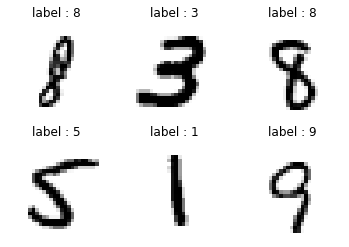

In [3]:
j = 1

for i in np.random.choice(np.arange(0, len(y_train)), size = 6):
    # Image
    img = X_train[i] 
    
    fig=plt.subplot(2,3,j)
    j+=1
    plt.axis('off')
    plt.imshow(img,cmap=cm.binary,interpolation='None')
    plt.title('label : ' +str(y_train[i]))

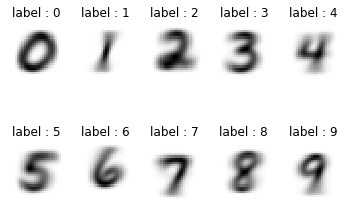

In [4]:
for label in range(0,10):
    tableau=X_train[y_train==label]
    image_moyenne=tableau.mean(axis=0)
    plt.subplot(2, 5, label+1)
    plt.axis('off')
    plt.imshow(image_moyenne, cmap=cm.binary, interpolation='None')
    plt.title('label : ' +str(label))

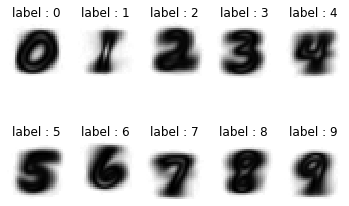

In [5]:
for label in range(0,10):
    tableau=X_train[y_train==label]
    image_moyenne=tableau.std(axis=0)
    plt.subplot(2, 5, label+1)
    plt.axis('off')
    plt.imshow(image_moyenne, cmap=cm.binary, interpolation='None')
    plt.title('label : ' +str(label))


In [6]:
#au cas où permet de faire en sorte que les images fassent 28 * 28 pour un randomforest, le -1 c'est pour toutes
X_train=X_train.reshape([-1,28*28])
X_test=X_test.reshape([-1,28*28])

print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)



Shape of X: (60000, 784)
Shape of y: (60000,)


In [7]:
model=RandomForestClassifier(n_jobs=-1)
model.fit(X_train,y_train)


RandomForestClassifier(n_jobs=-1)

In [8]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
print('Précision : '+ str(accuracy_score(y_test,y_pred)))

Précision : 0.9702


In [9]:
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Le chiffre 3 a souvent été pris pour le chiffre 2
Le chiffre 4 a souvent été pris pour le chiffre 9
Le chiffre 5 a souvent été pris pour le chiffre 3
Le chiffre 7 a souvent été pris pour le chiffre 2
Le chiffre 7 a souvent été pris pour le chiffre 9
Le chiffre 9 a souvent été pris pour le chiffre 4


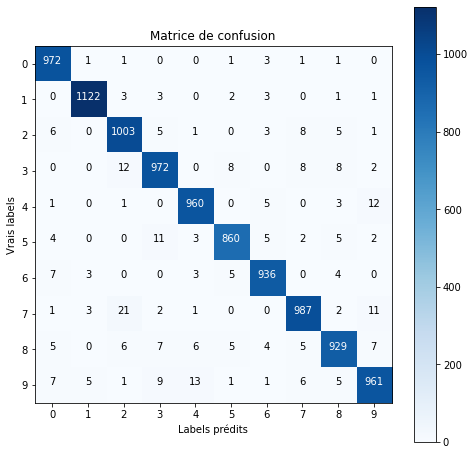

In [10]:
cnf_matrix=confusion_matrix(y_test,y_pred)

item=itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])) 
classes = range(0,10)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    if(cnf_matrix[i,j] >10 and i!=j):
        print("Le chiffre {0} a souvent été pris pour le chiffre {1}".format(i,j))
        
        
plt.figure(figsize=(8,8))
plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")


plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()


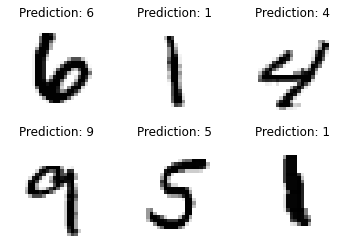

In [11]:
j = 1

for i in np.random.choice(np.arange(0, len(y_test)), size=6):
    img = X_test[i] 
    
    # Redimensionnement de l'image
    img = img.reshape(28, 28)
    
    # Sélection de la sous-figure
    plt.subplot(2, 3, j)
    j = j + 1
    
    # Suppression des axes
    plt.axis('off')
    
    # Affichage de l'image en niveaux de gris
    plt.imshow(img, cmap = cm.binary)
    plt.title('Prediction: ' + str(y_pred[i]))

In [12]:
# Pour importer le datasets mnist de Keras
from keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changement de forme
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:', y_train.shape)

Shape of X: (60000, 784)
Shape of y: (60000,)


In [13]:
X_train=X_train/255
X_test=X_test/255

In [14]:
y_train = np_utils.to_categorical(y_train, dtype = 'int') # Veiller à n'exécuter cette instruction qu'une seule fois
y_test = np_utils.to_categorical(y_test, dtype = 'int')   # Veiller à n'exécuter cette instruction qu'une seule fois

# La méthode *np_utils.to_categorical* transforme les chiffres en vecteurs
# remplis de zéros, sauf à la position du chiffre en question qui vaut 1 
# Par exemple, 3 devient (0,0,0,1,0,0,0,0,0,0)

# Ainsi y_train et y_test deviennent des matrices de mêmes nombres de lignes mais avec autant
# de colonnes que de classes (chiffres uniques) qu'elles possèdent.

num_pixels = X_train.shape[1]
num_classes = y_test.shape[1]

In [15]:
# Instanciation du modèle
model = Sequential()

# Instanciation de la première couche dense
first_layer = Dense(units = 20,                     # nombre de neurones
                    input_dim = num_pixels,         # dimension du vecteur d'entrée
                    kernel_initializer ='normal',   # loi d'initialisation du vecteur de poids
                    activation ='tanh')             # fonction d'activation

# Instanciation de la seconde couche dense
second_layer = Dense(units = num_classes,
                     kernel_initializer ='normal',
                     activation ='softmax')

# Ajout des couches aux modèle
model.add(first_layer)
model.add(second_layer)

Metal device set to: Apple M1


2021-11-07 10:24:17.813753: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-07 10:24:17.815434: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
model.compile(loss = 'categorical_crossentropy',  # fonction de perte
              optimizer = 'adam',                 # algorithme d'optimisation
              metrics = ['accuracy'])             # métrique d'évaluation

In [17]:
training_history = model.fit(X_train, y_train,          # données d'entraînement
                             epochs = 20,               # nombre d'epochs
                             batch_size = 200,          # taille des batchs
                             validation_split = 0.2)    # proportion de l'échantillon de validation

Epoch 1/20
  1/240 [..............................] - ETA: 41s - loss: 2.3217 - accuracy: 0.0950

2021-11-07 10:24:19.587108: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-07 10:24:19.589768: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-07 10:24:19.707687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


240/240 [==============================] - ETA: 0s - loss: 1.1998 - accuracy: 0.7826

2021-11-07 10:24:20.987456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


240/240 [==============================] - 2s 6ms/step - loss: 1.1998 - accuracy: 0.7826 - val_loss: 0.5750 - val_accuracy: 0.8873
Epoch 2/20
240/240 [==============================] - 1s 6ms/step - loss: 0.4665 - accuracy: 0.8942 - val_loss: 0.3681 - val_accuracy: 0.9100
Epoch 3/20
240/240 [==============================] - 1s 6ms/step - loss: 0.3448 - accuracy: 0.9106 - val_loss: 0.3037 - val_accuracy: 0.9181
Epoch 4/20
240/240 [==============================] - 1s 6ms/step - loss: 0.2918 - accuracy: 0.9204 - val_loss: 0.2685 - val_accuracy: 0.9265
Epoch 5/20
240/240 [==============================] - 1s 5ms/step - loss: 0.2603 - accuracy: 0.9276 - val_loss: 0.2476 - val_accuracy: 0.9301
Epoch 6/20
240/240 [==============================] - 1s 6ms/step - loss: 0.2381 - accuracy: 0.9328 - val_loss: 0.2339 - val_accuracy: 0.9337
Epoch 7/20
240/240 [==============================] - 1s 6ms/step - loss: 0.2218 - accuracy: 0.9367 - val_loss: 0.2215 - val_accuracy: 0.9367
Epoch 8/20
240/24

In [18]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

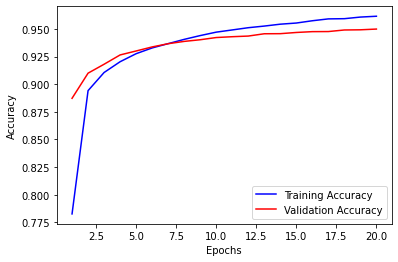

In [19]:
# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe de la précision sur l'échantillon d'entrainement
plt.plot(np.arange(1 , 21, 1),
         training_history.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')

# Courbe de la précision sur l'échantillon de validation
plt.plot(np.arange(1 , 21, 1),
         training_history.history['val_accuracy'], 
         label = 'Validation Accuracy',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

In [20]:
# Prediction de l'échantillon de test
y_pred = model.predict(X_test)

# Evaluation du modèle
score = model.evaluate(X_test, y_test)
score

2021-11-07 10:24:46.179786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 33/313 [==>...........................] - ETA: 1s - loss: 0.1691 - accuracy: 0.9413

2021-11-07 10:24:46.493181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.1733 - accuracy: 0.9492


[0.17328405380249023, 0.9492000341415405]

In [21]:
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

print(metrics.classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.96      0.95      0.96       982
           5       0.94      0.90      0.92       892
           6       0.96      0.96      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.93      0.94      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



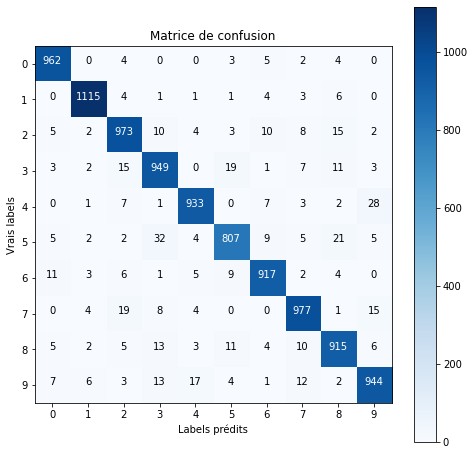

In [22]:
cnf_matrix=metrics.confusion_matrix(y_test_class,y_pred_class)

###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
classes = range(0,10)

plt.figure(figsize=(8,8))


plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()